## Introduction
The yellow taxi industry in New York City plays a pivotal role in urban transportation, serving millions of passengers annually. This project focuses on analyzing the Yellow Taxi Trip Dataset for January 2024 to uncover insights about passenger behaviors, trip characteristics, fare trends, and payment patterns. By leveraging data preprocessing and statistical analysis, we aim to identify key factors affecting trip duration, fare amounts, and trip distances while exploring the relationship between payment methods and fare dynamics.

This analysis provides valuable insights for policymakers, transportation agencies, and stakeholders to optimize taxi operations, enhance passenger satisfaction, and inform pricing strategies.


## Aim of the project
To analyze the payment preferences (cash vs. card) among yellow taxi passengers in NYC with respect to fare amounts and trip distances using statistical hypothesis testing, and to identify significant differences in payment behavior and fare trends.

##Objective

**Data Cleaning and Preparation:**
Process the dataset by handling missing values, outliers, and duplicates.
Filter and retain relevant trip data, such as valid passenger counts, payment types, and positive fare amounts.

**Exploratory Data Analysis (EDA):**
Explore the distribution of fare amounts, trip distances, and payment types (cash vs. card).
Visualize relationships between payment types and key variables like fare amount and trip distance.

**Hypothesis Testing:**
Formulate and test the null hypothesis: "There is no significant difference in fare amounts between cash and card payments."
Conduct a two-sample t-test to compare fare amounts for cash and card payments.

**Insights and Recommendations:**
Analyze the results of the t-test to determine if a significant difference exists.
Provide actionable insights for stakeholders to optimize payment systems and enhance customer satisfaction.

Importing all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

Loading Data and Storing it in the df Variable

In [ ]:
df = pd.read_parquet('yellow_tripdata_2024-01.parquet')

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


Data Preprocessing

In [ ]:
df.shape

(2964624, 19)

In [ ]:
df.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object

In [ ]:
df['duration'] =df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration']

0         0 days 00:19:48
1         0 days 00:06:36
2         0 days 00:17:55
3         0 days 00:08:18
4         0 days 00:06:06
                ...      
2964619   0 days 00:08:37
2964620   0 days 00:14:45
2964621   0 days 00:19:00
2964622   0 days 00:17:51
2964623   0 days 00:15:05
Name: duration, Length: 2964624, dtype: timedelta64[us]

In [ ]:
df['duration'] = df['duration'].dt.total_seconds()/60

In [ ]:
data = df[['passenger_count','trip_distance','payment_type','fare_amount','duration']]
data

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.72,2,17.70,19.800000
1,1.0,1.80,1,10.00,6.600000
2,1.0,4.70,1,23.30,17.916667
3,1.0,1.40,1,10.00,8.300000
4,1.0,0.80,1,7.90,6.100000
...,...,...,...,...,...
2964619,NaN,3.18,0,15.77,8.616667
2964620,NaN,4.00,0,18.40,14.750000
2964621,NaN,3.33,0,19.97,19.000000
2964622,NaN,3.06,0,23.88,17.850000


In [ ]:
data.isnull().sum()

passenger_count    140162
trip_distance           0
payment_type            0
fare_amount             0
duration                0
dtype: int64

In [ ]:
(140162/len(data)*100)

4.727817085741734

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['passenger_count']=data['passenger_count'].astype(int)

In [ ]:
data[data.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,duration
1028,2,0.70,1,6.5,4.816667
2594,2,0.75,1,5.8,3.250000
2795,3,0.81,1,8.6,7.983333
2996,1,2.06,1,12.8,11.033333
3386,1,1.52,1,9.3,6.633333
...,...,...,...,...,...
2824449,1,1.28,1,10.0,9.033333
2824450,1,0.00,2,70.0,0.116667
2824452,1,3.50,1,19.1,17.300000
2824455,1,1.94,1,11.4,8.833333


In [ ]:
data.drop_duplicates(inplace=True)

Feature Engineering

In [ ]:
data['passenger_count'].value_counts()

passenger_count
1    1153146
2     315432
3      84178
4      49845
5      32428
0      26011
6      21853
8         45
7          8
9          1
Name: count, dtype: int64

In [ ]:
data['payment_type'].value_counts()

payment_type
1    1278756
2     345591
4      42787
3      15813
Name: count, dtype: int64

In [ ]:
data = data[data['payment_type']<3]
data = data[(data['passenger_count']>0) & (data['passenger_count']<6)]

In [ ]:
data['payment_type'].replace([1,2],['card','cash'],inplace=True)

In [ ]:
data

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.72,cash,17.7,19.800000
1,1,1.80,card,10.0,6.600000
2,1,4.70,card,23.3,17.916667
3,1,1.40,card,10.0,8.300000
4,1,0.80,card,7.9,6.100000
...,...,...,...,...,...
2824456,1,7.68,card,31.0,14.416667
2824457,1,3.51,card,16.3,8.033333
2824458,1,3.36,card,18.4,16.516667
2824459,3,3.30,card,17.7,16.783333


In [ ]:
data.describe()

,passenger_count,trip_distance,fare_amount,duration
count,1.577569e+06,1.577569e+06,1.577569e+06,1.577569e+06
mean,1.471666e+00,4.658786e+00,2.421611e+01,2.057123e+01
std,8.837876e-01,1.602199e+01,2.116216e+01,4.549112e+01
min,1.000000e+00,0.000000e+00,-8.990000e+02,-1.356667e+01
25%,1.000000e+00,1.400000e+00,1.140000e+01,1.013333e+01
50%,1.000000e+00,2.520000e+00,1.700000e+01,1.608333e+01
75%,2.000000e+00,5.370000e+00,2.890000e+01,2.433333e+01
max,5.000000e+00,1.540032e+04,2.221300e+03,9.455400e+03


In [ ]:
data = data[data['fare_amount']>0]
data = data[data['trip_distance']>0]
data = data[data['duration']>0]

In [ ]:
data.describe()

,passenger_count,trip_distance,fare_amount,duration
count,1.554774e+06,1.554774e+06,1.554774e+06,1.554774e+06
mean,1.472369e+00,4.708671e+00,2.430405e+01,2.065956e+01
std,8.846589e-01,1.612690e+01,2.049635e+01,4.545995e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.440000e+00,1.140000e+01,1.023333e+01
50%,1.000000e+00,2.560000e+00,1.700000e+01,1.615000e+01
75%,2.000000e+00,5.430000e+00,2.890000e+01,2.436667e+01
max,5.000000e+00,1.540032e+04,2.221300e+03,9.455400e+03



Exploratory Data Analysis

(array([1.554142e+06, 5.880000e+02, 3.400000e+01, 6.000000e+00,
        2.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 2.221390e+02, 4.442680e+02, 6.663970e+02,
        8.885260e+02, 1.110655e+03, 1.332784e+03, 1.554913e+03,
        1.777042e+03, 1.999171e+03, 2.221300e+03]),
 <BarContainer object of 10 artists>)

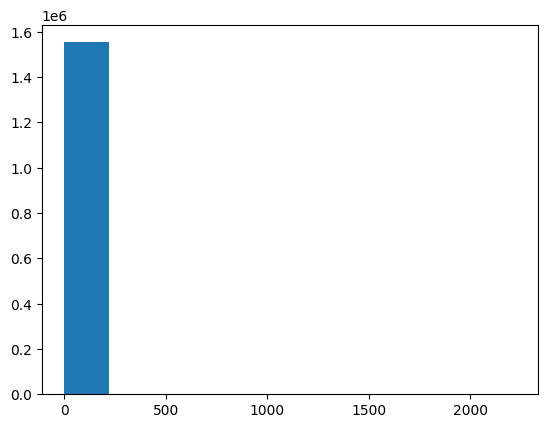

In [ ]:
plt.hist(data['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x12ebb3f5640>,
 'caps': [<matplotlib.lines.Line2D at 0x12ebb460a70>,
 'boxes': [<matplotlib.lines.Line2D at 0x12ebb3f6360>],
 'medians': [<matplotlib.lines.Line2D at 0x12ebb461040>],
 'fliers': [<matplotlib.lines.Line2D at 0x12ebb4612b0>],
 'means': []}

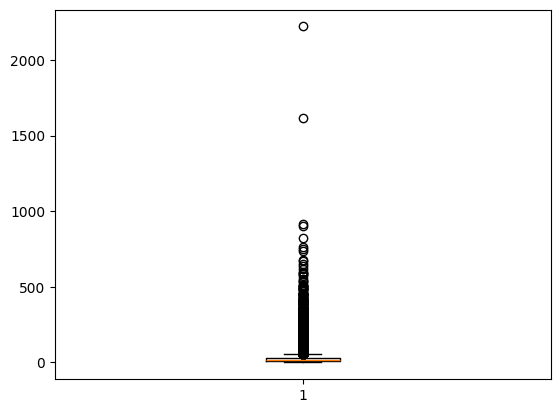

In [ ]:
plt.boxplot(data['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x12ebb4ae2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x12ebb4ae8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12ebb4ae000>],
 'medians': [<matplotlib.lines.Line2D at 0x12ebb4aeed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12ebb4af1a0>],
 'means': []}

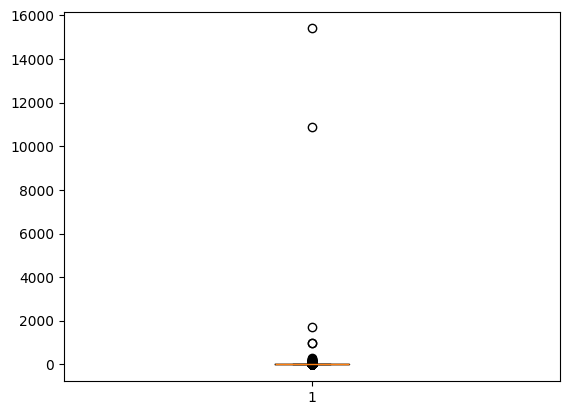

In [ ]:
plt.boxplot(data['trip_distance'])

{'whiskers': [<matplotlib.lines.Line2D at 0x12ebb512bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x12ebb513140>,
 'boxes': [<matplotlib.lines.Line2D at 0x12ebb512930>],
 'medians': [<matplotlib.lines.Line2D at 0x12ebb5136b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12ebb513950>],
 'means': []}

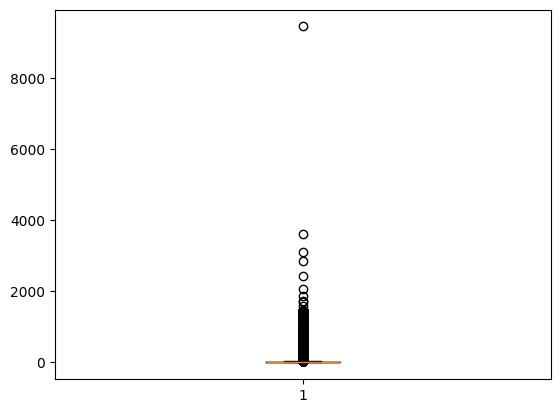

In [ ]:
plt.boxplot(data['duration'])

In [ ]:
for col in ['trip_distance','fare_amount','duration']:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1
    lower_bond = q1 - 1.5*(IQR)
    upper_bond = q3 + 1.5*(IQR)

    data = data[(data[col]>=lower_bond) & (data[col]<=upper_bond)]

In [ ]:
data

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.72,cash,17.7,19.800000
1,1,1.80,card,10.0,6.600000
2,1,4.70,card,23.3,17.916667
3,1,1.40,card,10.0,8.300000
4,1,0.80,card,7.9,6.100000
...,...,...,...,...,...
2824456,1,7.68,card,31.0,14.416667
2824457,1,3.51,card,16.3,8.033333
2824458,1,3.36,card,18.4,16.516667
2824459,3,3.30,card,17.7,16.783333


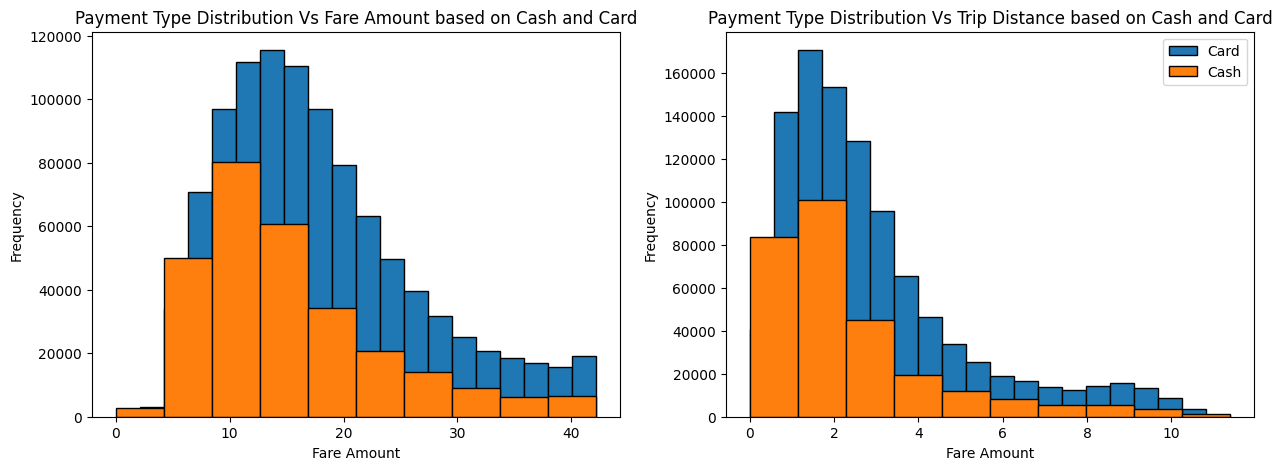

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Payment Type Distribution Vs Fare Amount based on Cash and Card")
plt.hist(data[data['payment_type']=='card']['fare_amount'],bins=20,edgecolor='k',label='Card')
plt.hist(data[data['payment_type']=='cash']['fare_amount'],edgecolor='k',label='Cash')
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
plt.title("Payment Type Distribution Vs Trip Distance based on Cash and Card")
plt.hist(data[data['payment_type']=='card']['trip_distance'],bins=20,edgecolor='k',label='Card')
plt.hist(data[data['payment_type']=='cash']['trip_distance'],edgecolor='k',label='Cash')
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
data.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
card           17.690486  8.531799      2.931181  2.199094
cash           15.090543  8.145765      2.378371  2.039686

In [ ]:
data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

passenger_count
payment_type passenger_count                 
card         1                         706477
             2                         201414
             3                          56684
             4                          30082
             5                          24400
cash         1                         203268
             2                          52523
             3                          14015
             4                          10148
             5                           4993

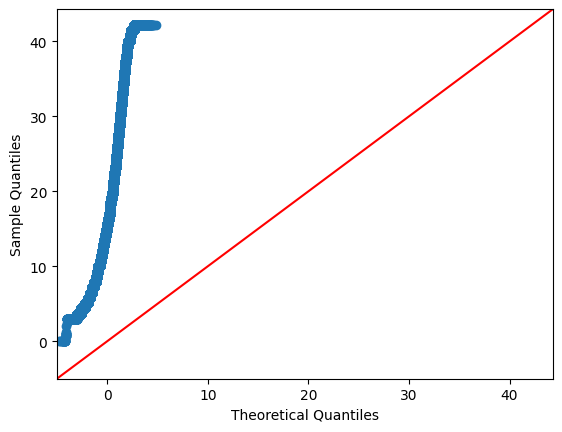

In [ ]:
import statsmodels.api as sm
sm.qqplot(data['fare_amount'],line='45')
plt.show()

In [ ]:
card_sample = data[data['payment_type']=='card']['fare_amount']
cash_sample = data[data['payment_type']=='cash']['fare_amount']

Hypothesis Testing

In [ ]:
t_stats,p_value = st.ttest_ind(a = card_sample,b = cash_sample,equal_var = False)
print("T Statistics value is :",t_stats," & ","P-Value is :",p_value)

T Statistics value is : 149.04517637070035  &  P-Value is : 0.0


## Conclusion
**Hypothesis Testing Results:**
The two-sample t-test yielded a T-Statistics value of 149.05 and a P-Value of 0.0. Since the P-Value is significantly less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in fare amounts between cash and card payments.

**Key Insights:**

Card payments are the preferred method, especially for trips with higher fare amounts and longer distances.
Cash payments are more likely for shorter trips or lower fare amounts, indicating possible behavioral differences among passengers.

**Implications:**
The results suggest that offering incentives for card payments could enhance passenger convenience and streamline operations.
Operators can tailor marketing strategies and service improvements based on passenger payment preferences.
This project demonstrates that statistical hypothesis testing is a powerful tool for uncovering meaningful patterns in transactional data, enabling data-driven decisions to improve operational efficiency and passenger satisfaction.